# <font color = 'blue'>**Import Libraries/Packages**

In [1]:
import numpy as np
import pandas as pd

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from matplotlib import *
import os
import sys
from pylab import *

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings('ignore')

# <font color = 'blue'>**Custom Functions**

In [2]:
def check_rare(var):
    cat_freq = 100 * df[var].value_counts(normalize=True)
    fig = cat_freq.sort_values(ascending=False).plot.bar()
    fig.axhline(y=5, color='red')
    fig.set_ylabel('category percentage frequency')
    fig.set_xlabel(var)
    fig.set_title('Identifying Rare Categories')
    plt.show()

In [3]:
def plot_by_category(target, category, ylabel):
    # Getting percentage churn for each category
    percent_churn_by_category = df.groupby(category)[target].mean().round(2).reset_index()

    # Setting up the plot size
    plt.figure(figsize = (8, 5))

    # Creating the bar plot using matplotlib
    plt.bar(percent_churn_by_category[category].values, percent_churn_by_category[target].values)
    plt.xlabel(category)
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} by {category}')
    plt.show()

In [4]:
def diagnostic_plots(df, variable):
    '''
    This function takes a dataframe (df) and
    the variable of interest as arguments.
    And it plots histogram, box-plot and QQ-plot.
    '''

    # define figure size
    plt.figure(figsize=(16, 4))

    '''
    We can use subplot to plot various plots in same plot, so that it can viewed as a single plot.
    Using this function we can create a table of plots.
    '''
    # histogram
    # plt.subplot(num rows, num columns, index)
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    # plt.subplot(num rows, num columns, index)
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    # plt.subplot(num rows, num columns, index)
    plt.subplot(1, 3, 3)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q plot')

    plt.show()

In [5]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# <font color = 'blue'>**Explanatory Data Analysis**

## <font color = 'blue'>**Check Data**

In [6]:
df = pd.read_csv("2_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379139 entries, 0 to 379138
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                379139 non-null  object 
 1   Campaign ID         379139 non-null  int64  
 2   Campaign Goal Code  379139 non-null  object 
 3   Campaign Ad ID      379139 non-null  int64  
 4   Ad Digital Channel  379139 non-null  object 
 5   Ad channel partner  379139 non-null  object 
 6   Ad Device           121221 non-null  object 
 7   Ad Group            121221 non-null  float64
 8   Ad Content ID       235150 non-null  float64
 9   Ad Content Type     379042 non-null  object 
 10  Audience Type       379139 non-null  object 
 11  $ Spend             379139 non-null  int64  
 12  # Impressions       379139 non-null  int64  
 13  # Clicks            379139 non-null  int64  
 14  # Video Completes   379139 non-null  int64  
 15  # Social Likes      379139 non-nul

In [7]:
df.columns

Index(['Date', 'Campaign ID', 'Campaign Goal Code', 'Campaign Ad ID',
       'Ad Digital Channel', 'Ad channel partner', 'Ad Device', 'Ad Group',
       'Ad Content ID', 'Ad Content Type', 'Audience Type', '$ Spend',
       '# Impressions', '# Clicks', '# Video Completes', '# Social Likes',
       '# Social Shares', '# Web Visit', '# Collateral View', '# Product View',
       '# Form Complete'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379139 entries, 0 to 379138
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                379139 non-null  object 
 1   Campaign ID         379139 non-null  int64  
 2   Campaign Goal Code  379139 non-null  object 
 3   Campaign Ad ID      379139 non-null  int64  
 4   Ad Digital Channel  379139 non-null  object 
 5   Ad channel partner  379139 non-null  object 
 6   Ad Device           121221 non-null  object 
 7   Ad Group            121221 non-null  float64
 8   Ad Content ID       235150 non-null  float64
 9   Ad Content Type     379042 non-null  object 
 10  Audience Type       379139 non-null  object 
 11  $ Spend             379139 non-null  int64  
 12  # Impressions       379139 non-null  int64  
 13  # Clicks            379139 non-null  int64  
 14  # Video Completes   379139 non-null  int64  
 15  # Social Likes      379139 non-nul

In [9]:
df.nunique()

Date                    234
Campaign ID               5
Campaign Goal Code        5
Campaign Ad ID         1018
Ad Digital Channel        3
Ad channel partner        8
Ad Device                 3
Ad Group                 31
Ad Content ID            91
Ad Content Type           3
Audience Type             5
$ Spend                 175
# Impressions         35145
# Clicks                769
# Video Completes      4577
# Social Likes           30
# Social Shares          12
# Web Visit             100
# Collateral View        49
# Product View           49
# Form Complete           9
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Campaign ID,379139.0,2.953270,1.403029,1.0,2.0,3.0,4.0,5.0
Campaign Ad ID,379139.0,567.661515,272.930785,1.0,343.0,534.0,876.0,1018.0
Ad Group,121221.0,16.491276,11.398192,1.0,3.0,18.0,28.0,31.0
Ad Content ID,235150.0,49.505324,26.652174,1.0,28.0,53.0,72.0,91.0
$ Spend,379139.0,17.677016,23.267288,0.0,0.0,7.0,28.0,183.0
# Impressions,379139.0,4167.014443,10821.393338,0.0,0.0,214.0,2950.0,411247.0
# Clicks,379139.0,969.706335,4918.847417,0.0,0.0,0.0,0.0,277500.0
# Video Completes,379139.0,64.848143,590.190888,0.0,0.0,0.0,0.0,28392.0
# Social Likes,379139.0,0.023846,0.375018,0.0,0.0,0.0,0.0,32.0
# Social Shares,379139.0,0.001047,0.094119,0.0,0.0,0.0,0.0,45.0


In [11]:
# To check the duplicates of the data
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
#print(df[dups])

True


## <font color = 'blue'>**Quantifying Missing Data**

In [12]:
df.isna().mean()*100

Date                   0.000000
Campaign ID            0.000000
Campaign Goal Code     0.000000
Campaign Ad ID         0.000000
Ad Digital Channel     0.000000
Ad channel partner     0.000000
Ad Device             68.027293
Ad Group              68.027293
Ad Content ID         37.977892
Ad Content Type        0.025584
Audience Type          0.000000
$ Spend                0.000000
# Impressions          0.000000
# Clicks               0.000000
# Video Completes      0.000000
# Social Likes         0.000000
# Social Shares        0.000000
# Web Visit            0.000000
# Collateral View      0.000000
# Product View         0.000000
# Form Complete        0.000000
dtype: float64

## <font color = 'blue'>**Identify numerical, categorical and discrete variables**

In [13]:
# Create a list of categorical variables
# Since the dtype of categorical variable is Object we can compare the values with 'O' 
categorical = [var for var in df.columns if df[var].dtype == 'O']

# Create a list of discrete variables
# we do not want to consider Exited as this is target variable
discrete = [
    var for var in df.columns if df[var].dtype != 'O'
    and len(df[var].unique()) < 20 and var not in ['Exited']
]

# Create a list of continuous Variables
# We don't wan't to consider CustomerId here
# we do not want to consider Exited as this is target variable
continuous = [
    var for var in df.columns if df[var].dtype != 'O'
    if var not in discrete and var not in ['CustomerId'] and var not in ['Exited']
]

In [14]:
# check continous Variables
continuous

['Campaign Ad ID',
 'Ad Group',
 'Ad Content ID',
 '$ Spend',
 '# Impressions',
 '# Clicks',
 '# Video Completes',
 '# Social Likes',
 '# Web Visit',
 '# Collateral View',
 '# Product View']

In [15]:
# check categorical variables
categorical

['Date',
 'Campaign Goal Code',
 'Ad Digital Channel',
 'Ad channel partner',
 'Ad Device',
 'Ad Content Type',
 'Audience Type']

In [16]:
# check discrete variables
discrete

['Campaign ID', '# Social Shares', '# Form Complete']

In [17]:
# Check number of unique values for continuous variables
total_unique_values= df[continuous].nunique()
for key, value in total_unique_values.items():
    if value > 0:
        print(key,":",value)

Campaign Ad ID : 1018
Ad Group : 31
Ad Content ID : 91
$ Spend : 175
# Impressions : 35145
# Clicks : 769
# Video Completes : 4577
# Social Likes : 30
# Web Visit : 100
# Collateral View : 49
# Product View : 49


In [18]:
for var in continuous:
    print(var, df[var].unique(), '\n')

Campaign Ad ID [921 901  47 ... 220 230 884] 

Ad Group [18. 13. 20. 10. 27. nan 25. 31.  5. 16.  1.  7. 21.  3.  9. 28. 29. 30.
 15. 23. 19. 26. 12. 14. 22. 24. 11. 17.  4.  6.  2.  8.] 

Ad Content ID [nan 85. 86. 87. 75. 81. 83. 22. 88. 90. 74.  7.  2. 15. 55. 70. 66. 46.
 49. 48. 35. 39. 21. 53. 72. 65. 63. 58.  5. 28. 42. 51. 32.  9. 26. 30.
 13. 20.  1. 80. 25. 19. 60. 61. 50. 24. 17. 77. 67. 69. 68. 18. 59. 37.
 34. 44. 11. 36.  3. 23. 78.  4.  6. 79.  8. 56. 27. 62. 47. 84. 16. 33.
 40. 43. 29. 12. 64. 89. 41. 52. 38. 76. 45. 31. 54. 10. 14. 82. 57. 73.
 71. 91.] 

$ Spend [  0  25  10   9   6   3  12  47   2  36  16  27  39  50  17   1  20  71
  26  65  21  30  15  14   7  13  59 107  38  77  49  79  22  78  52  45
  24  57  34  61  62  23  72  28   4  46  92  54  29  66  35   5  18 102
  41  42  40  56  11  33  99  31  19   8  51  55  37 148  48 104  76  32
 118  43  44  53  63  75  70  84  73  91  85  89  64  68  60  96  58  86
 110  67  69  90  74  80  98 109  93 122 111 10

In [19]:
# Check number of unique values for categorical variables
total_unique_values= df[categorical].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Date : 234
Campaign Goal Code : 5
Ad Digital Channel : 3
Ad channel partner : 8
Ad Device : 3
Ad Content Type : 3
Audience Type : 5


## <font color = 'blue'>**Check Variable Distributions**

In [20]:
# Let's check the columns with categorical variables
df[categorical].head()

,Date,Campaign Goal Code,Ad Digital Channel,Ad channel partner,Ad Device,Ad Content Type,Audience Type
0,12/14/2022,Intent to Buy,Search,Channel Partner 1,Tablets,Text,Audience Type 1
1,12/14/2022,Intent to Buy,Search,Channel Partner 1,Computers,Text,Audience Type 1
2,1/11/2023,Intent to Buy,Search,Channel Partner 1,Computers,Text,Audience Type 1
3,1/11/2023,Intent to Buy,Search,Channel Partner 1,Computers,Text,Audience Type 1
4,1/11/2023,Intent to Buy,Search,Channel Partner 1,Computers,Text,Audience Type 1


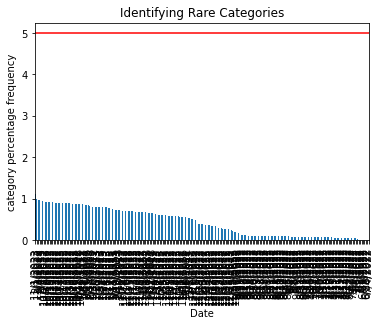

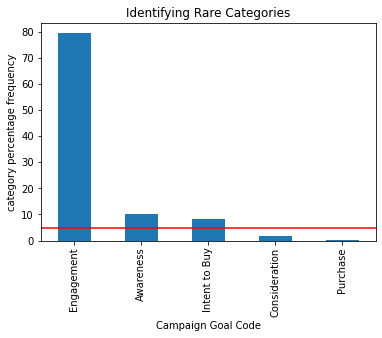

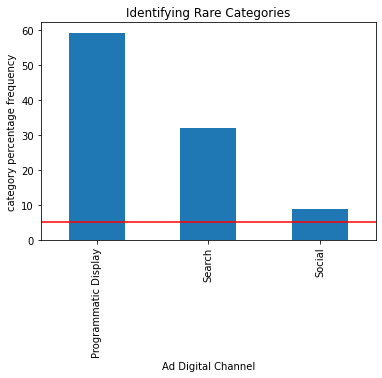

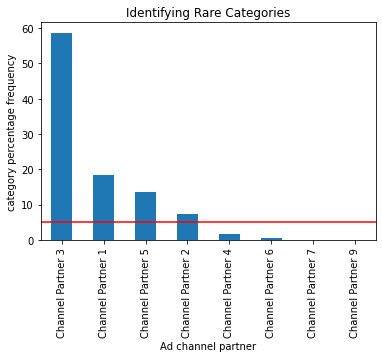

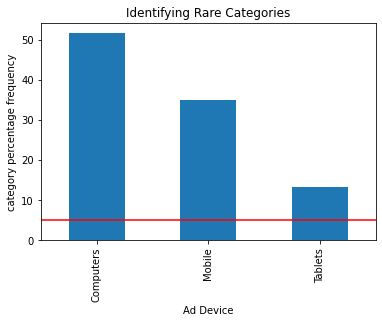

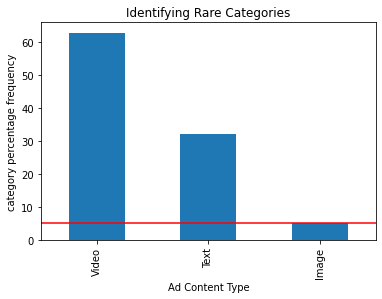

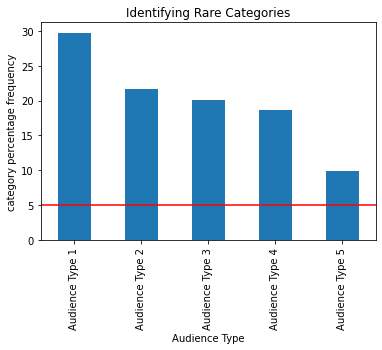

In [21]:
for var in categorical:
    check_rare(var)

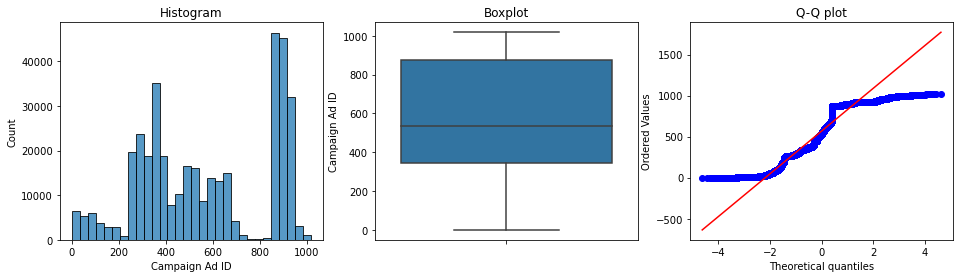

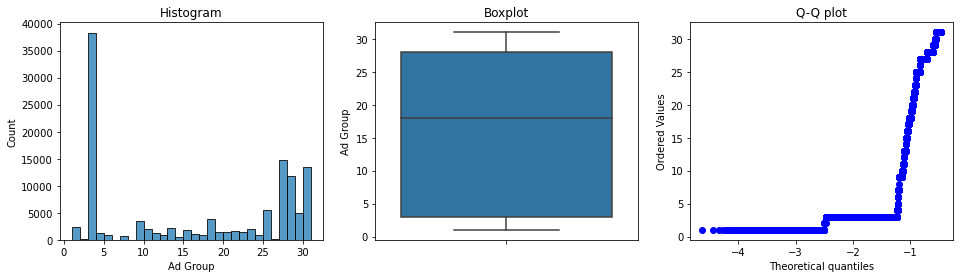

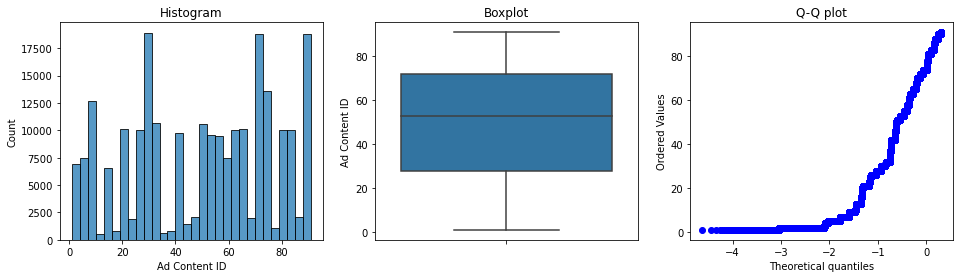

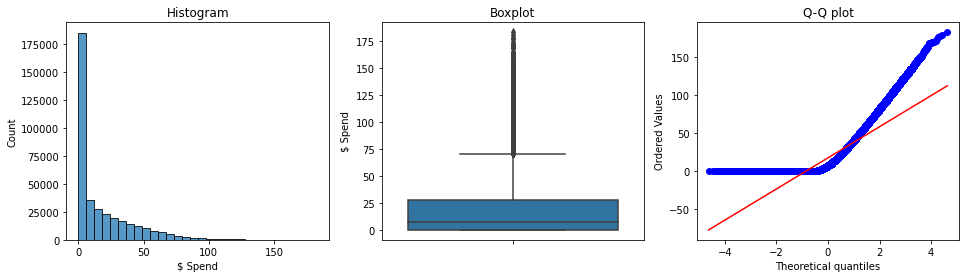

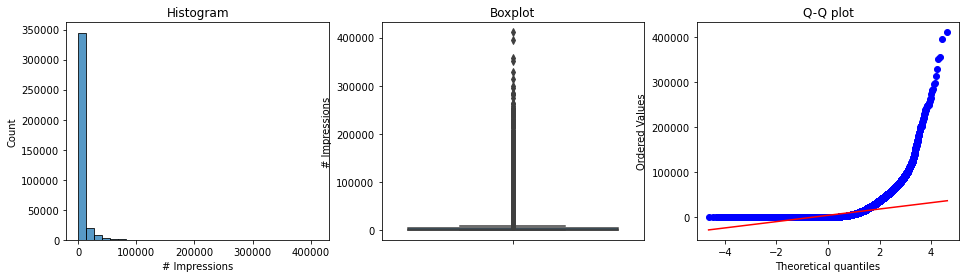

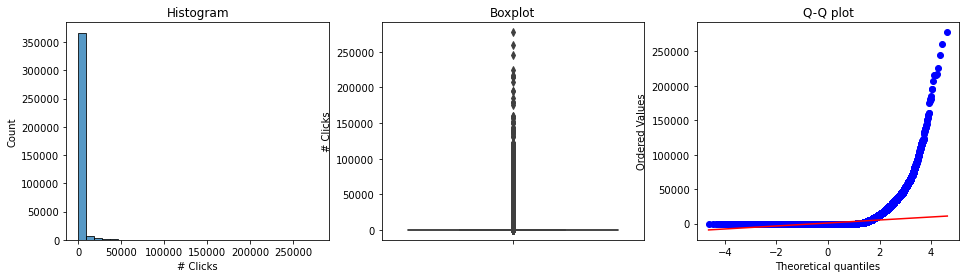

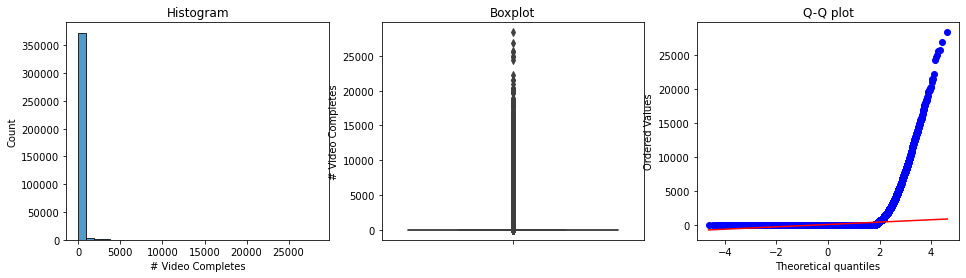

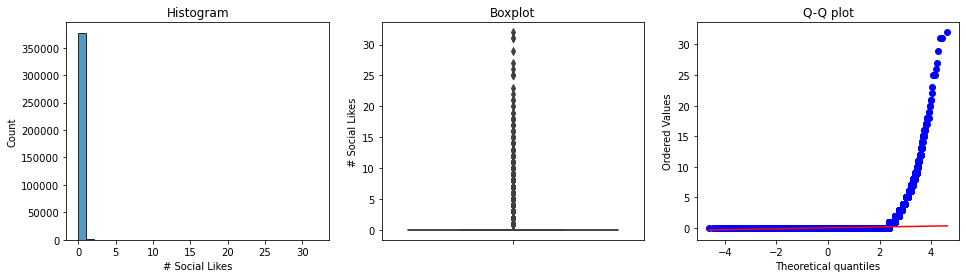

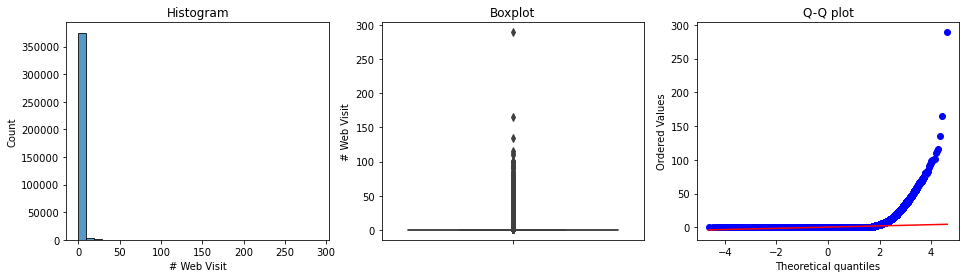

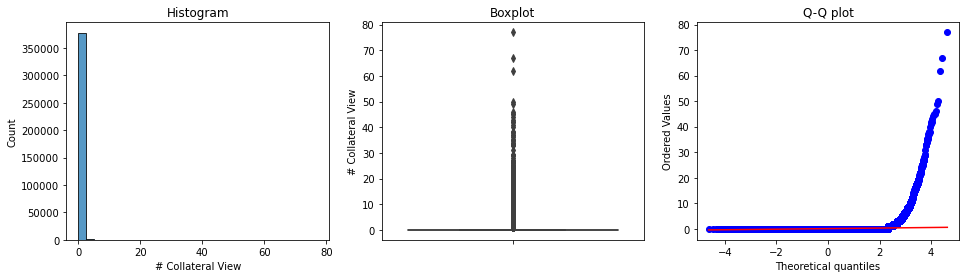

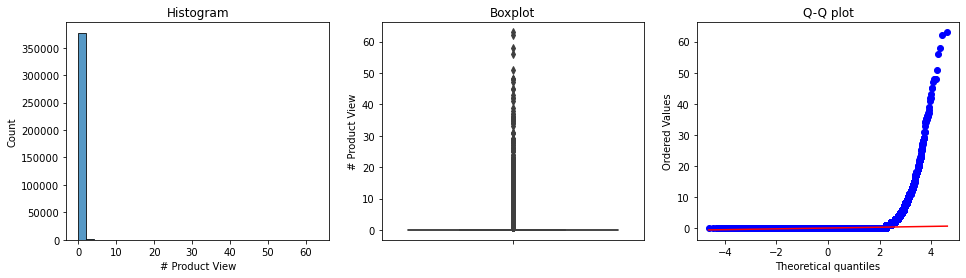

In [22]:
for var in continuous:
    diagnostic_plots(df, var)

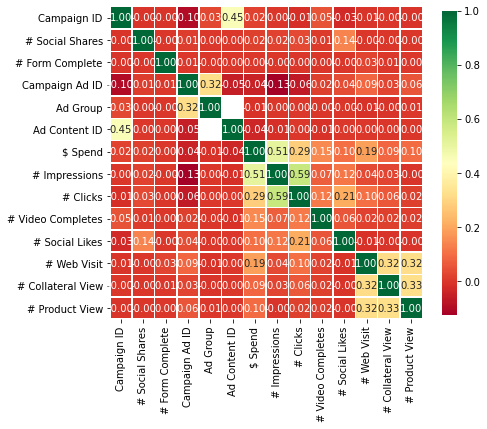

In [23]:
# We can check the correlation between every pair of attributes
# The correlation will be generated for the numerical data only
# we will use df.corr() to get correlatons and then use sns.heatmap to print the correlation matrix
corrmat = df[discrete + continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(df[top_corr_features].corr(),annot=True, square=True, fmt='.2f', 
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

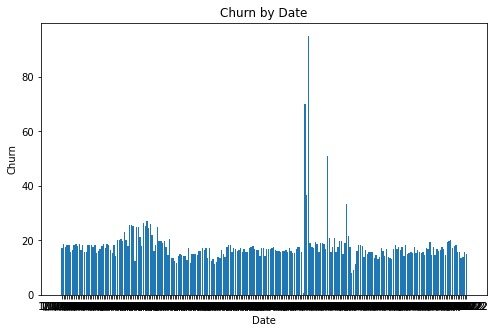

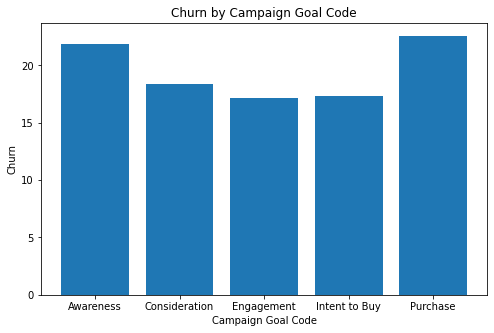

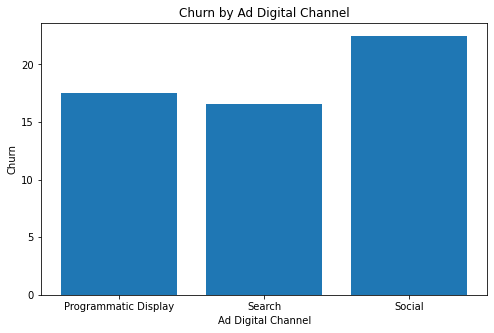

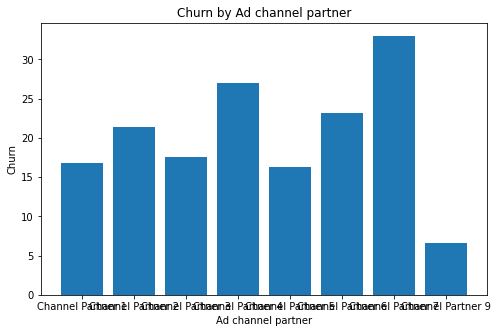

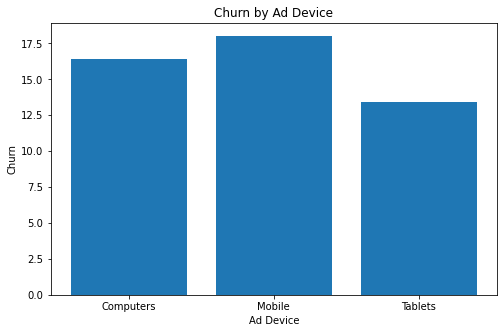

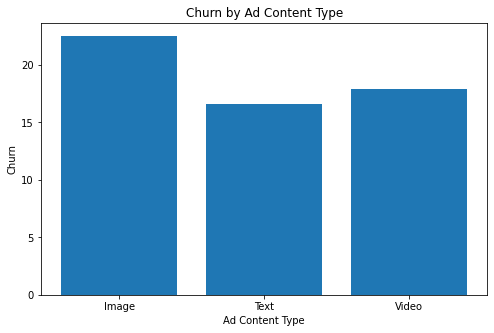

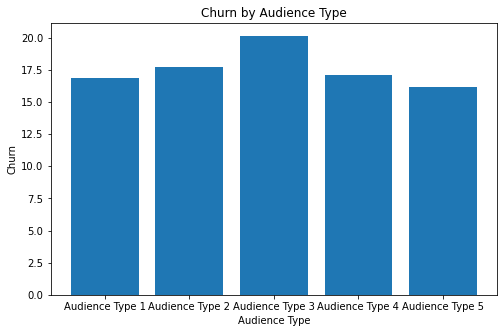

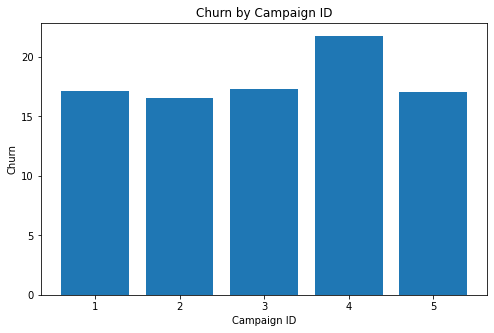

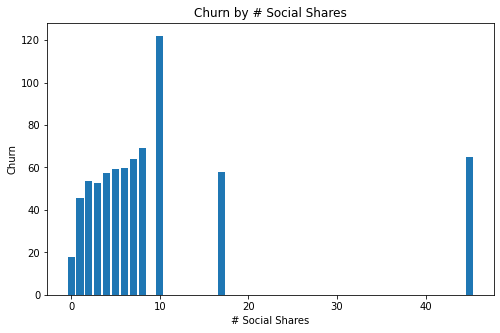

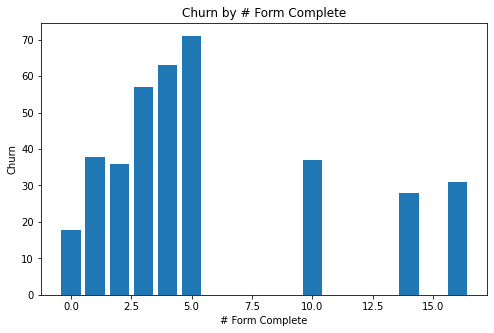

In [24]:
for category in categorical + discrete:
    plot_by_category('$ Spend', category, 'Churn')

## <font color = 'blue'>**Adding Marketing Metrics**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379139 entries, 0 to 379138
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                379139 non-null  object 
 1   Campaign ID         379139 non-null  int64  
 2   Campaign Goal Code  379139 non-null  object 
 3   Campaign Ad ID      379139 non-null  int64  
 4   Ad Digital Channel  379139 non-null  object 
 5   Ad channel partner  379139 non-null  object 
 6   Ad Device           121221 non-null  object 
 7   Ad Group            121221 non-null  float64
 8   Ad Content ID       235150 non-null  float64
 9   Ad Content Type     379042 non-null  object 
 10  Audience Type       379139 non-null  object 
 11  $ Spend             379139 non-null  int64  
 12  # Impressions       379139 non-null  int64  
 13  # Clicks            379139 non-null  int64  
 14  # Video Completes   379139 non-null  int64  
 15  # Social Likes      379139 non-nul

In [8]:
df["cpm"] = df["$ Spend"]/(df["# Impressions"]/1000)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df["cpm"] = df["cpm"].fillna(0)

In [9]:
df["cpc"] = df["$ Spend"]/df["# Clicks"]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df["cpc"] = df["cpc"].fillna(0)

In [10]:
df["ctr"] = (df["# Clicks"]/df["# Impressions"])*100
df["ctr"] = df["ctr"].fillna(0)

In [11]:
df.head(3)

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,...,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete,cpm,cpc,ctr
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,...,0,0,0,0,0,0,0,0.000000,0.0,0.000000
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,0,0,0,0,0,0,0,347.222222,0.5,69.444444
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,0,0,0,0,0,0,0,0.000000,0.0,0.000000


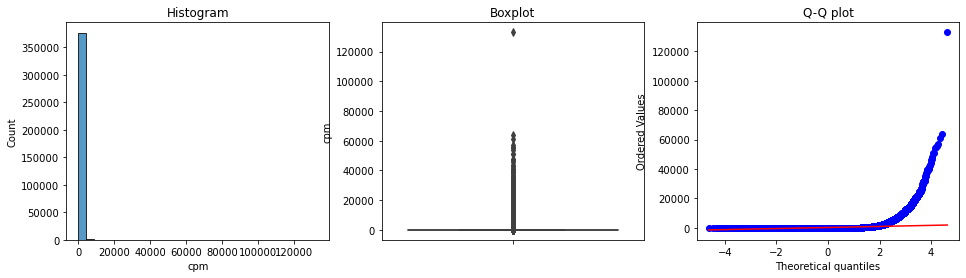

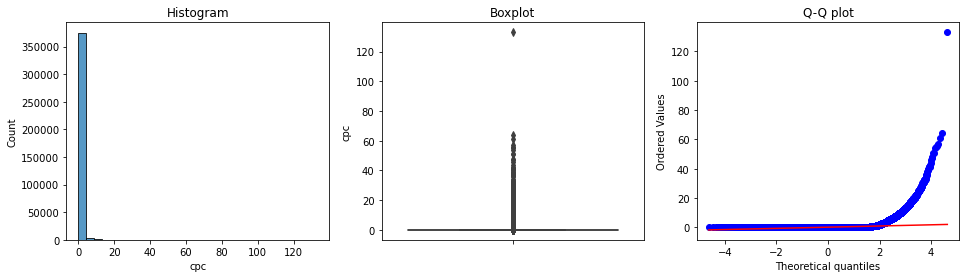

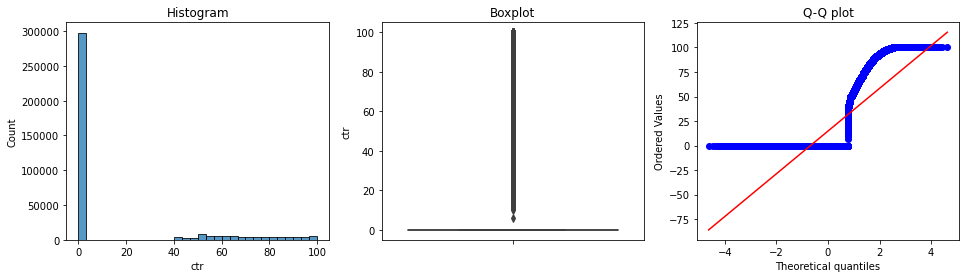

In [16]:
added = df[["cpm", "cpc", "ctr"]]
for var in added:
    diagnostic_plots(df, var)

In [17]:
df.describe()

,Campaign ID,Campaign Ad ID,Ad Group,Ad Content ID,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete,cpm,cpc,ctr
count,379139.000000,379139.000000,121221.000000,235150.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000,379139.000000
mean,2.953270,567.661515,16.491276,49.505324,17.677016,4167.014443,969.706335,64.848143,0.023846,0.001047,0.355200,0.035705,0.043654,0.000198,155.605011,0.166401,14.797620
std,1.403029,272.930785,11.398192,26.652174,23.267288,10821.393338,4918.847417,590.190888,0.375018,0.094119,2.702422,0.639808,0.691292,0.041245,996.002817,1.117026,29.378759
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,343.000000,3.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,534.000000,18.000000,53.000000,7.000000,214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.345464,0.000000,0.000000
75%,4.000000,876.000000,28.000000,72.000000,28.000000,2950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.139691,0.000000,0.000000
max,5.000000,1018.000000,31.000000,91.000000,183.000000,411247.000000,277500.000000,28392.000000,32.000000,45.000000,289.000000,77.000000,63.000000,16.000000,133000.000000,133.000000,100.000000


## <font color = 'blue'>**Linear Regression**

### <font color = 'blue'>**CPM basis**

In [18]:
from sklearn import linear_model

X = df[['# Impressions', '# Clicks', '# Video Completes', 'Ad Digital Channel', 'Ad channel partner', 'Campaign Goal Code']]
y = df['cpm']

X = pd.get_dummies(data=X, drop_first=True)

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [19]:
print(regr.intercept_)

112.66321293891359


In [20]:
coef_parameter = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])
coef_parameter.transpose()

,# Impressions,# Clicks,# Video Completes,Ad Digital Channel_Search,Ad Digital Channel_Social,Ad channel partner_Channel Partner 2,Ad channel partner_Channel Partner 3,Ad channel partner_Channel Partner 4,Ad channel partner_Channel Partner 5,Ad channel partner_Channel Partner 6,Ad channel partner_Channel Partner 7,Ad channel partner_Channel Partner 9,Campaign Goal Code_Consideration,Campaign Goal Code_Engagement,Campaign Goal Code_Intent to Buy,Campaign Goal Code_Purchase
Coefficient,-0.002904,0.000889,-0.009112,173.474604,-61.657254,25.774695,-61.261393,-17.937822,-178.814341,-50.555957,-33.540039,-35.954087,398.297607,11.791996,537.813769,1644.590325


### <font color = 'blue'>**CPC basis**

In [21]:
X = df[['# Impressions', '# Clicks', '# Video Completes', 'Ad Digital Channel', 'Ad channel partner', 'Campaign Goal Code']]
y = df['cpc']

X = pd.get_dummies(data=X, drop_first=True)

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [22]:
print(regr.intercept_)

0.11009534781896413


In [23]:
coef_parameter = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])
coef_parameter.transpose()

,# Impressions,# Clicks,# Video Completes,Ad Digital Channel_Search,Ad Digital Channel_Social,Ad channel partner_Channel Partner 2,Ad channel partner_Channel Partner 3,Ad channel partner_Channel Partner 4,Ad channel partner_Channel Partner 5,Ad channel partner_Channel Partner 6,Ad channel partner_Channel Partner 7,Ad channel partner_Channel Partner 9,Campaign Goal Code_Consideration,Campaign Goal Code_Engagement,Campaign Goal Code_Intent to Buy,Campaign Goal Code_Purchase
Coefficient,-0.000003,0.000001,-0.000008,0.218149,-0.066187,0.013051,-0.067618,-0.012422,-0.212554,-0.084344,-0.021772,-0.045044,0.488791,0.007244,0.65792,1.768225


### <font color = 'blue'>**CTR basis**

In [24]:
X = df[['# Impressions', '# Clicks', '# Video Completes', 'Ad Digital Channel', 'Ad channel partner', 'Campaign Goal Code']]
y = df['ctr']

X = pd.get_dummies(data=X, drop_first=True)

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [25]:
print(regr.intercept_)

17.158380241257987


In [26]:
coef_parameter = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])
coef_parameter.transpose()

,# Impressions,# Clicks,# Video Completes,Ad Digital Channel_Search,Ad Digital Channel_Social,Ad channel partner_Channel Partner 2,Ad channel partner_Channel Partner 3,Ad channel partner_Channel Partner 4,Ad channel partner_Channel Partner 5,Ad channel partner_Channel Partner 6,Ad channel partner_Channel Partner 7,Ad channel partner_Channel Partner 9,Campaign Goal Code_Consideration,Campaign Goal Code_Engagement,Campaign Goal Code_Intent to Buy,Campaign Goal Code_Purchase
Coefficient,-0.000315,0.002633,0.004551,4.681143,6.511669,-5.415477,-8.893869,11.15105,1.693917,-2.298942,22.427194,-21.651098,3.334856,-1.333481,2.666636,11.140144


## <font color = 'blue'>**Random Forest**

In [27]:
from sklearn.model_selection import train_test_split
# before doing any data cleaning step we need to first split the data into train/test
X = df.drop(['Ad Digital Channel'], axis =1)
y = df['Ad Digital Channel']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=0, stratify =y)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379139 entries, 0 to 379138
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                379139 non-null  object 
 1   Campaign ID         379139 non-null  int64  
 2   Campaign Goal Code  379139 non-null  object 
 3   Campaign Ad ID      379139 non-null  int64  
 4   Ad channel partner  379139 non-null  object 
 5   Ad Device           121221 non-null  object 
 6   Ad Group            121221 non-null  float64
 7   Ad Content ID       235150 non-null  float64
 8   Ad Content Type     379042 non-null  object 
 9   Audience Type       379139 non-null  object 
 10  $ Spend             379139 non-null  int64  
 11  # Impressions       379139 non-null  int64  
 12  # Clicks            379139 non-null  int64  
 13  # Video Completes   379139 non-null  int64  
 14  # Social Likes      379139 non-null  int64  
 15  # Social Shares     379139 non-nul

## <font color = 'blue'>**Sampling**

In [29]:
dfs = df.sample(frac=0.01)
Xs = dfs.drop(['Ad Digital Channel'], axis =1)
ys = dfs['Ad Digital Channel']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, 
                                                    test_size=0.33, 
                                                    random_state=0, stratify =ys)

In [30]:
# drop arbitrary features
from feature_engine.selection import DropFeatures
# For categorical variables
from feature_engine.encoding import OneHotEncoder
# Missing value imputation
from feature_engine.imputation import MeanMedianImputer
# add missing indicator 
from feature_engine.imputation import AddMissingIndicator
# categorical imputer
from feature_engine.imputation import CategoricalImputer
# random sample imputer
from feature_engine.imputation import RandomSampleImputer
# feature engine wrapper 
from feature_engine.wrappers import SklearnTransformerWrapper
# Using Support Vector Machines as models
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [31]:
columns_to_drop = ['Ad Content ID', 'Campaign Ad ID', 'Campaign ID','Date', 'Ad Device', 'Ad Group', 'Ad Content Type', 'Date']

churn_pipeline_dtree = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['$ Spend', '# Impressions', '# Clicks'])),

    #('imputer_catgorical_frequent',
    #  CategoricalImputer(imputation_method = 'frequent', variables=['Ad channel partner'])),

    #  ('imputer_missing_indicator',
    #  AddMissingIndicator(variables=['Ad Device', 'Ad Group', 'Ad Content Type'])),

    #('imputer_random_sample',
    #  RandomSampleImputer(random_state=123, variables=[''])),
    
    ('one_hot_encoder',
      OneHotEncoder(variables=['Audience Type', 'Campaign Goal Code', 'Ad channel partner']
                   , drop_last= True, ignore_format=True)),

   
    ('dtree',
     DecisionTreeClassifier(random_state=0))
])

In [32]:
from sklearn import set_config

set_config(display='diagram')
churn_pipeline_dtree

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['Ad Content ID',
                                                'Campaign Ad ID', 'Campaign ID',
                                                'Date', 'Ad Device', 'Ad Group',
                                                'Ad Content Type', 'Date'])),
                ('imputer_median',
                 MeanMedianImputer(variables=['$ Spend', '# Impressions',
                                              '# Clicks'])),
                ('one_hot_encoder',
                 OneHotEncoder(drop_last=True, ignore_format=True,
                               variables=['Audience Type', 'Campaign Goal Code',
                                          'Ad channel partner'])),
                ('dtree', DecisionTreeClassifier(random_state=0))])

In [33]:
param_grid_1 = {
    'dtree__max_depth': np.arange(2,10),
    'dtree__min_samples_leaf': np.arange(2,10)
    
     }
# now we set up the grid search with cross-validation
grid_dtree_1 = GridSearchCV(churn_pipeline_dtree, param_grid_1,
                           cv=5, return_train_score= True, n_jobs=-1)

In [34]:
grid_dtree_1.fit(Xs_train,ys_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Ad '
                                                                       'Content '
                                                                       'ID',
                                                                       'Campaign '
                                                                       'Ad ID',
                                                                       'Campaign '
                                                                       'ID',
                                                                       'Date',
                                                                       'Ad '
                                                                       'Device',
                                                                       'Ad '
                                                                       'Group',
                                                                       'Ad '
                                                                       'Content '
                                                                       'Type',
                                                                       'Date'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['$ Spend',
                                                                     '# '
                                                                     'Impressions',
                                                                     '# '
                                                                     'Clicks'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['Audience '
                                                                 'Type',
                                                                 'Campaign '
                                                                 'Goal Code',
                                                                 'Ad channel '
                                                                 'partner'])),
                                       ('dtree',
                                        DecisionTreeClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'dtree__max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'dtree__min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True)

In [35]:
print(grid_dtree_1.best_params_)

{'dtree__max_depth': 5, 'dtree__min_samples_leaf': 3}


In [36]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/data/')
else:
    base_folder = Path('/home/data/')

data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2022'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

In [37]:
# save and load models
import joblib
from sklearn.model_selection import learning_curve   

In [38]:
file_best_estimator_round1 = save_model_folder / 'dtree_round1_best_estimator.pkl'
file_complete_grid_round1 = save_model_folder / 'dtree_round1_best_estimator.pkl'

joblib.dump(grid_dtree_1.best_estimator_, file_best_estimator_round1)
joblib.dump(grid_dtree_1, file_complete_grid_round1)

loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)
loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

<module 'matplotlib.pyplot' from 'C:\\Users\\USER\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

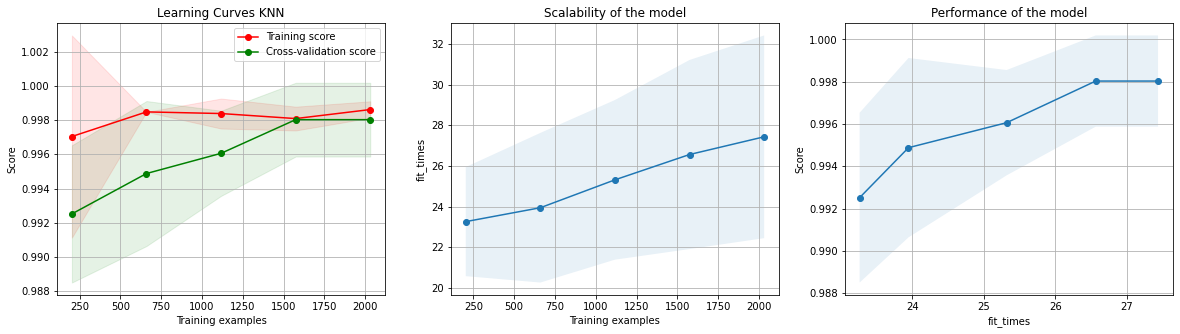

In [39]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves KNN', Xs_train, ys_train, n_jobs=-1)

## <font color = 'blue'>**Random Forest - Tune #2**

In [40]:
param_grid_2 = {
    'dtree__ccp_alpha': np.linspace(0., 0.025, 20),
    'dtree__max_depth': np.arange(2,10),
    'dtree__min_samples_leaf': np.arange(2,10)}

# now we set up the grid search with cross-validation
grid_dtree_2 = GridSearchCV(churn_pipeline_dtree, param_grid_2,
                           cv=5, return_train_score= True, n_jobs=-1)

In [41]:
grid_dtree_2.fit(Xs_train,ys_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Ad '
                                                                       'Content '
                                                                       'ID',
                                                                       'Campaign '
                                                                       'Ad ID',
                                                                       'Campaign '
                                                                       'ID',
                                                                       'Date',
                                                                       'Ad '
                                                                       'Device',
                                                                       'Ad '
                                                                       'Group',
                                                                       'Ad '
                                                                       'Content '
                                                                       'Type',
                                                                       'Date'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['$ Spend',
                                                                     '# '
                                                                     'Impressions',
                                                                     '# '
                                                                     'Clicks'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_for...
             param_grid={'dtree__ccp_alpha': array([0.        , 0.00131579, 0.00263158, 0.00394737, 0.00526316,
       0.00657895, 0.00789474, 0.00921053, 0.01052632, 0.01184211,
       0.01315789, 0.01447368, 0.01578947, 0.01710526, 0.01842105,
       0.01973684, 0.02105263, 0.02236842, 0.02368421, 0.025     ]),
                         'dtree__max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'dtree__min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True)

In [42]:
print(grid_dtree_2.best_params_)

{'dtree__ccp_alpha': 0.0, 'dtree__max_depth': 5, 'dtree__min_samples_leaf': 3}


In [43]:
file_best_estimator_round2 = save_model_folder / 'dtree_round2_best_estimator.pkl'
file_complete_grid_round2 = save_model_folder / 'dtree_round2_best_estimator.pkl'

joblib.dump(grid_dtree_2.best_estimator_, file_best_estimator_round2)
joblib.dump(grid_dtree_2, file_complete_grid_round2)

loaded_best_estimator_round2 = joblib.load(file_best_estimator_round2)
loaded_complete_grid_round2 = joblib.load(file_complete_grid_round2)

<module 'matplotlib.pyplot' from 'C:\\Users\\USER\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

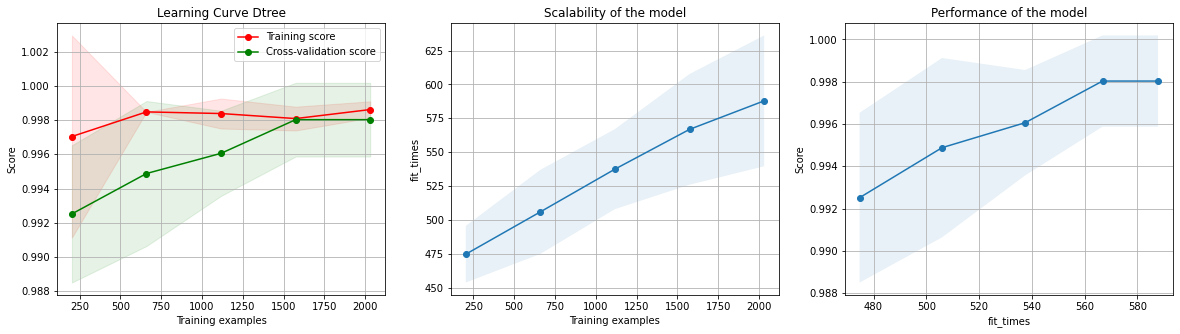

In [44]:
plot_learning_curve(loaded_best_estimator_round2, 'Learning Curve Dtree', Xs_train, ys_train, n_jobs=-1)

## <font color = 'blue'>**Linear SVC**

In [47]:
# Using Support Vector Machines as models
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [54]:
churn_pipeline_svc = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['$ Spend', '# Impressions', '# Clicks', 'cpm', 'cpc', 'ctr'])),

    #('imputer_catgorical_frequent',
    #  CategoricalImputer(imputation_method = 'frequent', variables=['Ad channel partner'])),

    #  ('imputer_missing_indicator',
    #  AddMissingIndicator(variables=['Ad Device', 'Ad Group', 'Ad Content Type'])),

    #('imputer_random_sample',
    #  RandomSampleImputer(random_state=123, variables=[''])),
    
    ('one_hot_encoder',
      OneHotEncoder(variables=['Audience Type', 'Campaign Goal Code', 'Ad channel partner']
                   , drop_last= True, ignore_format=True)),
    
    ('svc',
     LinearSVC(penalty ='l2',random_state=123, max_iter =100000, dual = False
                       ))
])

In [51]:
from sklearn import set_config

set_config(display='diagram')
churn_pipeline_svc

# sklearn pre-processor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [61]:
param_grid_3 = {
    #'discretizer_cs__transformer__n_bins': range(2, 8, 2),
    #'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    #'scalar__transformer': [StandardScaler(), MinMaxScaler()],
    'svc__C': [100],
    }


# now we set up the grid search with cross-validation
grid_svc_1 = GridSearchCV(churn_pipeline_svc, param_grid_3,
                           cv=5, return_train_score= True, n_jobs=-1 )

In [62]:
grid_svc_1.fit(Xs_train,ys_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Ad '
                                                                       'Content '
                                                                       'ID',
                                                                       'Campaign '
                                                                       'Ad ID',
                                                                       'Campaign '
                                                                       'ID',
                                                                       'Date',
                                                                       'Ad '
                                                                       'Device',
                                                                       'Ad '
                                                                       'Group',
                                                                       'Ad '
                                                                       'Content '
                                                                       'Type',
                                                                       'Date'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['$ Spend',
                                                                     '# '
                                                                     'Impressions',
                                                                     '# Clicks',
                                                                     'cpm',
                                                                     'cpc',
                                                                     'ctr'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['Audience '
                                                                 'Type',
                                                                 'Campaign '
                                                                 'Goal Code',
                                                                 'Ad channel '
                                                                 'partner'])),
                                       ('svc',
                                        LinearSVC(dual=False, max_iter=100000,
                                                  random_state=123))]),
             n_jobs=-1, param_grid={'svc__C': [100]}, return_train_score=True)

In [63]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_svc_1.best_params_)

{'svc__C': 100}


In [64]:
file_best_estimator_svc_round1 = save_model_folder / 'svc_round1_best_estimator.pkl'
file_complete_grid_svc_round1  = save_model_folder / 'svc_round1_complete_grid.pkl'

joblib.dump(grid_svc_1.best_estimator_, file_best_estimator_svc_round1 )
joblib.dump(grid_svc_1, file_complete_grid_svc_round1)

file_best_estimator_svc_round1 = joblib.load(file_best_estimator_svc_round1)
file_complete_grid_svc_round1 = joblib.load(file_complete_grid_svc_round1)

<module 'matplotlib.pyplot' from 'C:\\Users\\USER\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

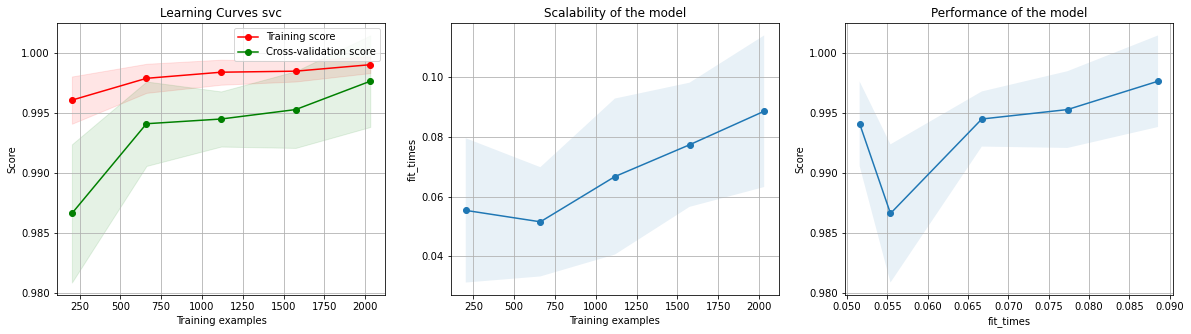

In [65]:
plot_learning_curve(file_best_estimator_svc_round1, 'Learning Curves svc', Xs_train, ys_train, n_jobs=-1)

In [66]:
#let's check the test scores for final model
print(f'Test data accauracy for round 4: {file_best_estimator_svc_round1.score(Xs_test,ys_test)}')

Test data accauracy for round 4: 0.9968051118210862


In [68]:
# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [71]:
file_best_estimator_svc = save_model_folder / 'svc_round1_best_estimator.pkl'
best_estimator_svc = joblib.load(file_best_estimator_svc )

In [75]:
ys_train.unique()

array(['Programmatic Display', 'Search', 'Social'], dtype=object)

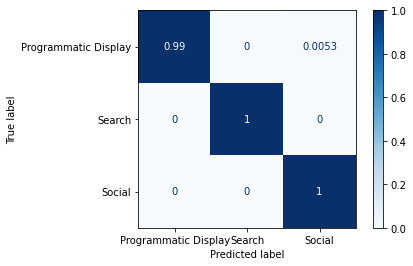

In [76]:
ConfusionMatrixDisplay.from_estimator(best_estimator_svc, Xs_test, ys_test,
                                 display_labels=['Programmatic Display', 'Search', 'Social'],
                                 cmap=plt.cm.Blues,
                                 normalize = 'true')
plt.grid(False)
plt.show()

## <font color = 'blue'>**Linear SVC - #2**

In [81]:
churn_pipeline_svc_2 = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['$ Spend', '# Impressions', '# Clicks', 'cpm', 'cpc', 'ctr'])),

    #('imputer_catgorical_frequent',
    #  CategoricalImputer(imputation_method = 'frequent', variables=['Ad channel partner'])),

    #  ('imputer_missing_indicator',
    #  AddMissingIndicator(variables=['Ad Device', 'Ad Group', 'Ad Content Type'])),

    #('imputer_random_sample',
    #  RandomSampleImputer(random_state=123, variables=[''])),
    
    ('one_hot_encoder',
      OneHotEncoder(variables=['Audience Type', 'Campaign Goal Code', 'Ad channel partner']
                   , drop_last= True, ignore_format=True)),
    
    ('svc',
     SVC(random_state=123))
])

In [94]:
param_grid_4 = {
    #'discretizer_cs__transformer__n_bins': range(2, 8, 2),
    #'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    #'scalar__transformer': [StandardScaler(), MinMaxScaler()],
    'svc__kernel' :['rbf', 'sigmoid'],
    'svc__C' :[10000]
    }

In [95]:
grid_svc_2 = GridSearchCV(churn_pipeline_svc_2, param_grid_4,
                           cv=5, return_train_score= True, n_jobs=-1 )

In [96]:
grid_svc_2.fit(Xs_train,ys_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Ad '
                                                                       'Content '
                                                                       'ID',
                                                                       'Campaign '
                                                                       'Ad ID',
                                                                       'Campaign '
                                                                       'ID',
                                                                       'Date',
                                                                       'Ad '
                                                                       'Device',
                                                                       'Ad '
                                                                       'Group',
                                                                       'Ad '
                                                                       'Content '
                                                                       'Type',
                                                                       'Date'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['$ Spend',
                                                                     '# '
                                                                     'Impressions',
                                                                     '# Clicks',
                                                                     'cpm',
                                                                     'cpc',
                                                                     'ctr'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['Audience '
                                                                 'Type',
                                                                 'Campaign '
                                                                 'Goal Code',
                                                                 'Ad channel '
                                                                 'partner'])),
                                       ('svc', SVC(random_state=123))]),
             n_jobs=-1,
             param_grid={'svc__C': [10000], 'svc__kernel': ['rbf', 'sigmoid']},
             return_train_score=True)

In [97]:
print(grid_svc_2.best_params_)

{'svc__C': 10000, 'svc__kernel': 'rbf'}


In [98]:
file_best_estimator_svc_round2 = save_model_folder / 'svc_round2_best_estimator.pkl'
file_complete_grid_svc_round2  = save_model_folder / 'svc_round2_complete_grid.pkl'

joblib.dump(grid_svc_2.best_estimator_, file_best_estimator_svc_round2 )
joblib.dump(grid_svc_2, file_complete_grid_svc_round2)

file_best_estimator_svc_round2 = joblib.load(file_best_estimator_svc_round2)
file_complete_grid_svc_round2 = joblib.load(file_complete_grid_svc_round2)

<module 'matplotlib.pyplot' from 'C:\\Users\\USER\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

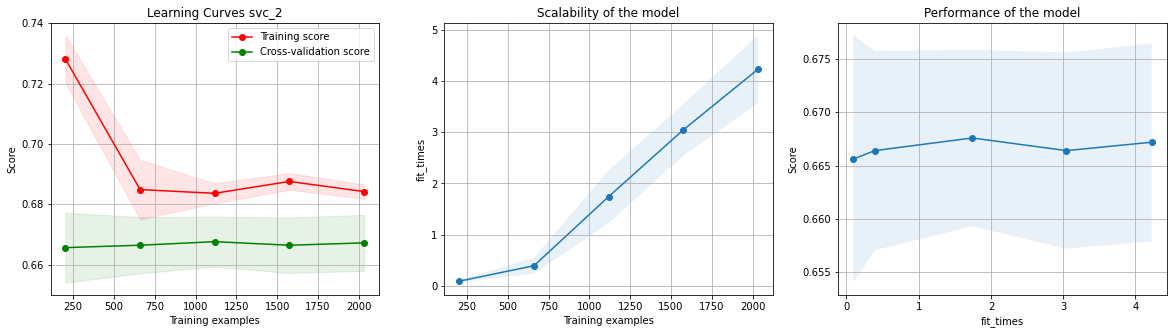

In [99]:
plot_learning_curve(file_best_estimator_svc_round2, 'Learning Curves svc_2', Xs_train, ys_train, n_jobs=-1)

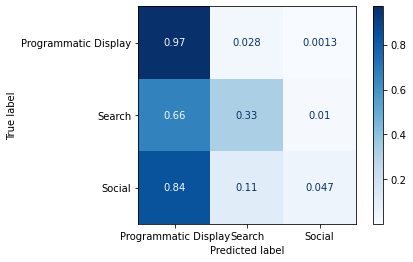

In [100]:
file_best_estimator_svc_2 = save_model_folder / 'svc_round2_best_estimator.pkl'
best_estimator_svc_2 = joblib.load(file_best_estimator_svc_2)

ConfusionMatrixDisplay.from_estimator(best_estimator_svc_2, Xs_test, ys_test,
                                 display_labels=['Programmatic Display', 'Search', 'Social'],
                                 cmap=plt.cm.Blues,
                                 normalize = 'true')
plt.grid(False)
plt.show()